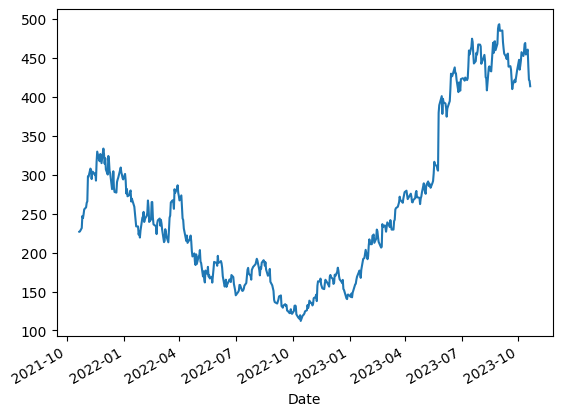

In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('NVDA_1.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Visualize data
df['Close'].plot()
# plt.figuresize(10,10)
plt.show()

# Check stationarity
result = adfuller(df['Close'])

In [4]:
result

(-0.4609711039300178,
 0.8994103463331627,
 0,
 502,
 {'1%': -3.4434437319767452,
  '5%': -2.8673146875484368,
  '10%': -2.569845688481135},
 3532.085988050315)

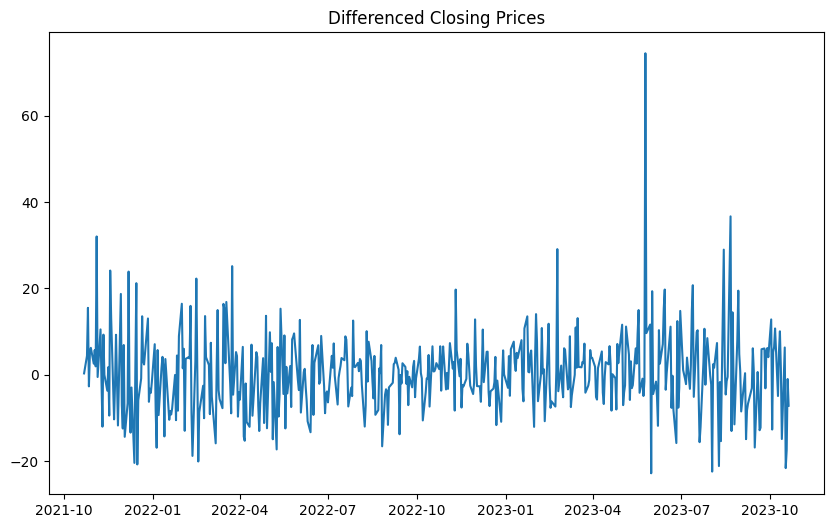

C:\Users\65820\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


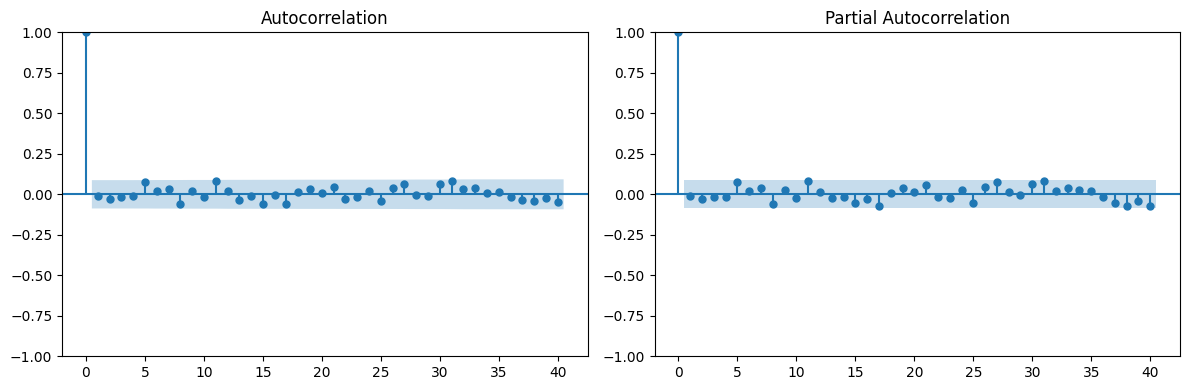

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Assuming you've already loaded the data into df
# Difference the series
df['diff_close'] = df['Close'].diff()

# Drop NaN values created due to differencing
df = df.dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['diff_close'])
plt.title('Differenced Closing Prices')
plt.show()

# Check stationarity on the differenced series (you can run adfuller again here if you like)

# Plot ACF and PACF
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(df['diff_close'], lags=40, ax=plt.gca())
plt.subplot(1, 2, 2)
plot_pacf(df['diff_close'], lags=40, ax=plt.gca())
plt.tight_layout()
plt.show()



In [20]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Assuming df is your dataframe loaded with the stock data
history = df['Close'].values.tolist()
future_days = 10
predictions = []

# Fit ARIMA model
arima_model = ARIMA(history[-60:], order=(1,1,1))
arima_result = arima_model.fit()

# Use ARIMA residuals to fit a GARCH model
garch_model = arch_model(arima_result.resid, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

# Rolling Forecast Origin for future days
for _ in range(future_days):
    # Predict ARIMA
    arima_yhat = arima_result.forecast()[0]
    
    # Get the GARCH volatility prediction
    garch_vol = garch_result.conditional_volatility[-1]
    
    # Add randomness to the ARIMA prediction using the GARCH volatility
    random_effect = np.random.normal(0, garch_vol)
    yhat = arima_yhat + random_effect
    
    predictions.append(yhat)
    history.append(yhat)
    
    # Update the ARIMA and GARCH models with the new value
    arima_model = ARIMA(history[-60:], order=(1,1,1))
    arima_result = arima_model.fit()
    garch_model = arch_model(arima_result.resid, vol='Garch', p=1, q=1)
    garch_result = garch_model.fit()

# Create a DataFrame and save to CSV
df_predictions = pd.DataFrame({
    'index': list(range(len(df), len(df) + future_days)),
    'Close': predictions
})

df_predictions.to_csv('predictions_2.csv', index=False)



Iteration:      1,   Func. Count:      6,   Neg. LLF: 1687.387763151595
Iteration:      2,   Func. Count:     12,   Neg. LLF: 253.55494419989975
Iteration:      3,   Func. Count:     17,   Neg. LLF: 252.4611482301755
Iteration:      4,   Func. Count:     22,   Neg. LLF: 251.89792644291185
Iteration:      5,   Func. Count:     27,   Neg. LLF: 251.6947479388712
Iteration:      6,   Func. Count:     32,   Neg. LLF: 251.29196484205428
Iteration:      7,   Func. Count:     37,   Neg. LLF: 251.2466063967828
Iteration:      8,   Func. Count:     42,   Neg. LLF: 251.23753300370626
Iteration:      9,   Func. Count:     47,   Neg. LLF: 251.185100269252
Iteration:     10,   Func. Count:     52,   Neg. LLF: 251.08112000597202
Iteration:     11,   Func. Count:     57,   Neg. LLF: 250.8132580907626
Iteration:     12,   Func. Count:     62,   Neg. LLF: 250.33358649660843
Iteration:     13,   Func. Count:     67,   Neg. LLF: 249.61178041910068
Iteration:     14,   Func. Count:     72,   Neg. LLF: 248.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1686.1081817119175
Iteration:      2,   Func. Count:     12,   Neg. LLF: 248.40662786204254
Iteration:      3,   Func. Count:     17,   Neg. LLF: 247.87081039833325
Iteration:      4,   Func. Count:     22,   Neg. LLF: 247.52755359561255
Iteration:      5,   Func. Count:     27,   Neg. LLF: 247.36592974908413
Iteration:      6,   Func. Count:     32,   Neg. LLF: 247.1593820392934
Iteration:      7,   Func. Count:     37,   Neg. LLF: 247.12991149772802
Iteration:      8,   Func. Count:     42,   Neg. LLF: 247.08633564293208
Iteration:      9,   Func. Count:     47,   Neg. LLF: 246.95857380145046
Iteration:     10,   Func. Count:     52,   Neg. LLF: 246.6576582254431
Iteration:     11,   Func. Count:     57,   Neg. LLF: 245.99593192321086
Iteration:     12,   Func. Count:     62,   Neg. LLF: 244.76855500408328
Iteration:     13,   Func. Count:     67,   Neg. LLF: 5701.324045250091
Iteration:     14,   Func. Count:     73,   Neg. LLF: 

C:\Users\65820\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\65820\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\65820\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregre

In [ ]:
#I tried using normal ARIMA but hte predictions kept sticking to the recent value (416) and not deviating, had to use garch to have a more volatile prediction